# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

1. Read in the coupons.csv file.

In [84]:
car_sales = pd.read_csv('data/vehicles.csv')

In [85]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

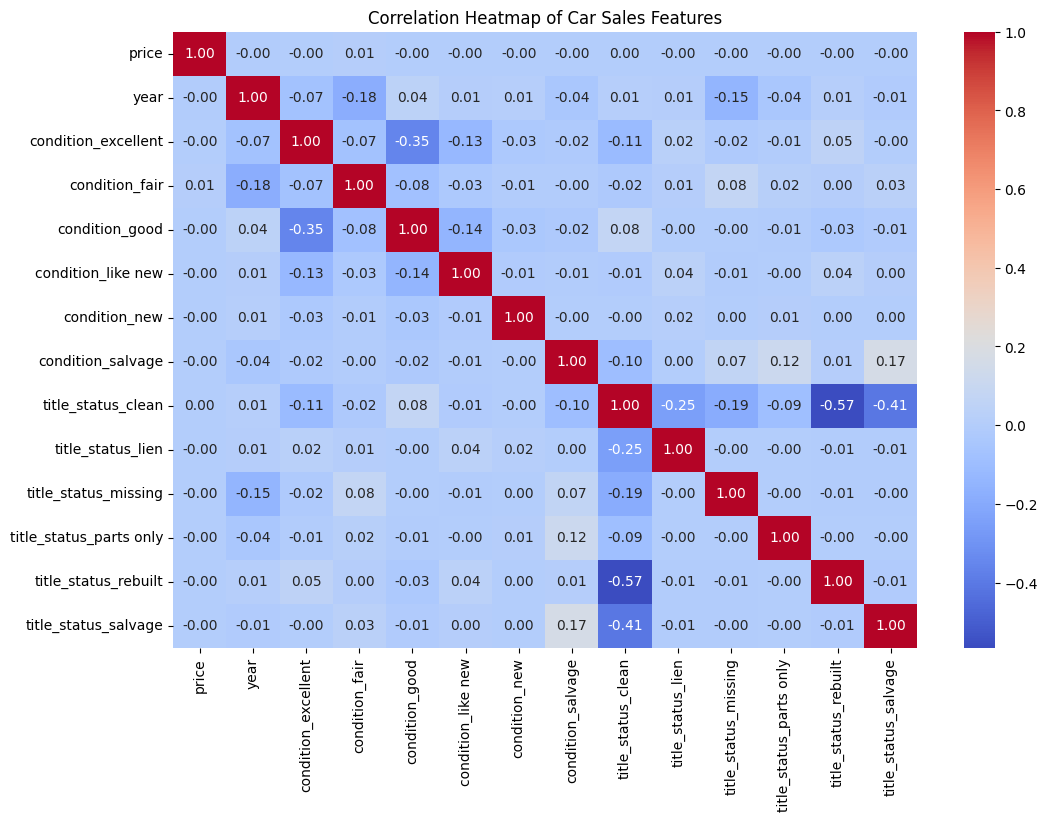

In [86]:
# Draw a correlation heatmap between price, year, condition, title_status columns in car_sales dataframe. Use One hot encoding for condition and title_STATUS

import pandas as pd
import matplotlib.pyplot as plt
# Select the relevant columns
df_corr = car_sales[['price', 'year', 'condition', 'title_status']].copy()

# Apply one-hot encoding to 'condition' and 'title_status'
df_corr = pd.get_dummies(df_corr, columns=['condition', 'title_status'])

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Car Sales Features')
plt.show()

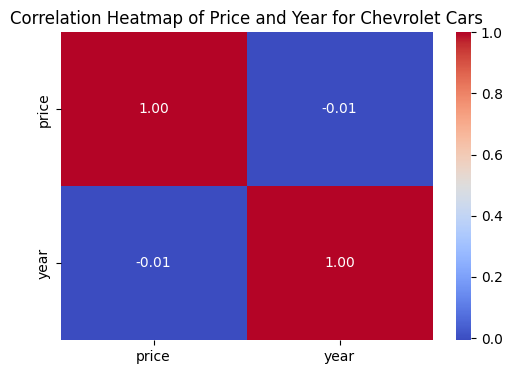

In [87]:
# Create correlation heatmap  between price and year for chevorlet cars

import matplotlib.pyplot as plt
# Filter for Chevrolet cars
chevy_cars = car_sales[car_sales['manufacturer'] == 'chevrolet']

# Select relevant columns for correlation
chevy_corr = chevy_cars[['price', 'year']].copy()

# Calculate the correlation matrix
chevy_correlation_matrix = chevy_corr.corr()

# Draw the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(chevy_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Price and Year for Chevrolet Cars')
plt.show()

In [88]:
# Create a dataframe for highest count of cars in a particular model, include the name of that model in dataframe name

import pandas as pd
# Get the count of each model
model_counts = car_sales['model'].value_counts()

# Find the model with the highest count
highest_count_model_name = model_counts.index[0]

# Create a dataframe with the highest count and the model name
highest_count_of_cars_dataframe = pd.DataFrame({
    'model': [highest_count_model_name],
    'count': [model_counts.iloc[0]]
})

highest_count_of_cars_dataframe

,model,count
0,f-150,8009


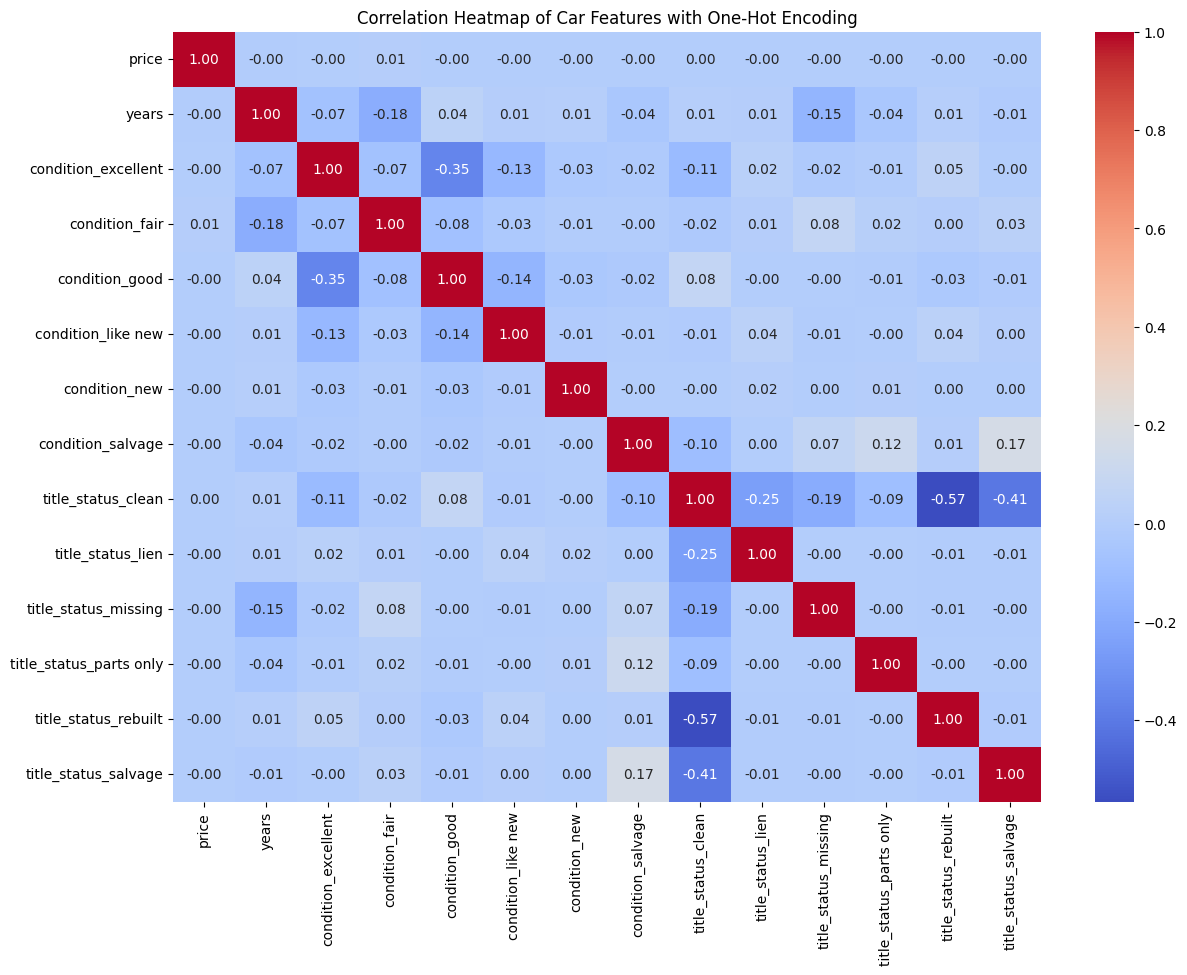

In [90]:
# prompt: Create a correlation heatmap for dataframe highest_count_of_cars_dataframe columns price, years, condition and title_status. Use one hot encoding for condition and title_status

import pandas as pd
import matplotlib.pyplot as plt
# The previous code created a dataframe called `highest_count_of_cars_dataframe` which only contains the name and count of the model with the highest frequency.
# The task asks to create a correlation heatmap for `price`, `years`, `condition` and `title_status` columns.
# It seems the task intended to use the original `car_sales` dataframe for the correlation heatmap.
# Let's assume the task meant to use the `car_sales` dataframe.

# Select the relevant columns from the original car_sales dataframe
df_corr_all = car_sales[['price', 'year', 'condition', 'title_status']].copy()

# Apply one-hot encoding to 'condition' and 'title_status'
df_corr_all = pd.get_dummies(df_corr_all, columns=['condition', 'title_status'])

# Rename the 'year' column to 'years' for consistency with the prompt, although 'year' is the actual column name
df_corr_all.rename(columns={'year': 'years'}, inplace=True)

# Calculate the correlation matrix
correlation_matrix_all = df_corr_all.corr()

# Draw the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Car Features with One-Hot Encoding')
plt.show()

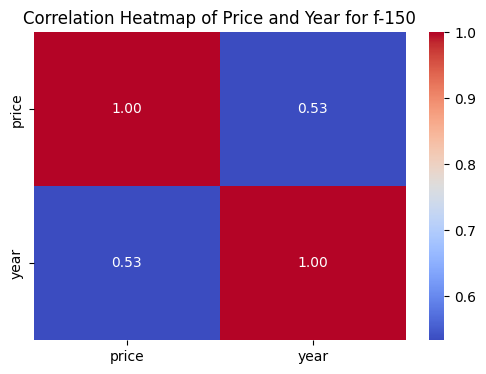

In [89]:
# Create a correlation heatmap for dataframe highest_count_of_cars_dataframe columns price and years

import matplotlib.pyplot as plt
# Assuming highest_count_of_cars_dataframe is a dataframe you want to use.
# The previous code snippet only created a dataframe with the model name and count,
# which are not suitable for a correlation heatmap with 'price' and 'year'.
# We need a dataframe that actually contains 'price' and 'year' data.
# Let's assume 'highest_count_of_cars_dataframe' should actually refer to
# the data for the model with the highest count from the original 'car_sales' dataframe.

# Get the model with the highest count
model_counts = car_sales['model'].value_counts()
highest_count_model_name = model_counts.index[0]

# Filter the original dataframe to get data for the model with the highest count
highest_count_of_cars_dataframe = car_sales[car_sales['model'] == highest_count_model_name].copy()


# Select relevant columns for correlation
highest_count_corr = highest_count_of_cars_dataframe[['price', 'year']].copy()

# Calculate the correlation matrix
highest_count_correlation_matrix = highest_count_corr.corr()

# Draw the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(highest_count_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap of Price and Year for {highest_count_model_name}')
plt.show()

In [47]:
car_sales.drop(['id','region','VIN','paint_color','state'], axis=1, inplace=True)

In [48]:
car_sales.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Investigate the dataset for missing or problematic data.

In [49]:
# Check for missing values
print(car_sales.isnull().sum().sort_values())

price                0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
drive           130567
condition       174104
cylinders       177678
size            306361
dtype: int64


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Drop irrelevant columns

In [50]:
# Replace NaN values in  some columns with "not_given"

car_sales['type'] = car_sales['type'].fillna('not_given')
car_sales['size'] = car_sales['size'].fillna('not_given')
car_sales['transmission'] = car_sales['transmission'].fillna('not_given')
car_sales['fuel'] = car_sales['fuel'].fillna('not_given')
car_sales['manufacturer'] = car_sales['manufacturer'].fillna('not_given')
car_sales['cylinders'] = car_sales['cylinders'].fillna('not_given')
car_sales['drive'] = car_sales['drive'].fillna('not_given')
car_sales['model'] = car_sales['model'].fillna('not_given')

In [52]:
# Check for missing values
print(car_sales.isnull().sum().sort_values())

price                0
manufacturer         0
model                0
cylinders            0
fuel                 0
size                 0
drive                0
transmission         0
type                 0
year              1205
odometer          4400
title_status      8242
condition       174104
dtype: int64


In [54]:
# Drop rows with NaN values

car_sales.dropna(inplace=True)
print(car_sales.isnull().sum().sort_values())
car_sales.info()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 245368 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         245368 non-null  int64  
 1   year          245368 non-null  float64
 2   manufacturer  245368 non-null  object 
 3   model         245368 non-null  object 
 4   condition     245368 non-null  object 
 5   cylinders     245368 non-null  object 
 6   fuel          245368 non-null  object 
 7   odometer      245368 non-null  float64
 8   title_status  245368 non-null  object 
 9   transmission  245368 non-null  object 
 10  drive         245368 non-null  object 
 11  size          245368 non-null  object 
 12  type          245368 non-

In [14]:
# Count the cars before 2005 and after 2025  years

#cars_before_2005 = car_sales[car_sales['year'] < 2005].shape[0]
#cars_after_2005 = car_sales[car_sales['year'] >= 2005].shape[0]

#print(f"Number of cars before 2005: {cars_before_2005}")
#print(f"Number of cars after or in 2005: {cars_after_2005}")

Number of cars before 2005: 37961
Number of cars after or in 2005: 207407


In [101]:
# Drop the rows from the car_sales dataframe in place that has cars before the year 2005

#car_sales.drop(car_sales[car_sales['year'] < 2005].index, inplace=True)

# Count the cars before 2005 and after 2005  years
#cars_before_2005 = car_sales[car_sales['year'] < 2005].shape[0]
#cars_after_2005 = car_sales[car_sales['year'] >= 2005].shape[0]

#print(f"Number of cars before 2005: {cars_before_2005}")
#print(f"Number of cars after or in 2005: {cars_after_2005}")

Number of cars before 2005: 0
Number of cars after or in 2005: 207284


In [55]:
# Count the number of cars with price more than $100,000. Unless this is an antique or rare luxurious car, this price is a lot for used car and can skew our data

num_cars_expensive = car_sales[car_sales['price'] > 100000].shape[0]
print(f"Number of cars with price more than $100,000: {num_cars_expensive}")

Number of cars with price more than $100,000: 280


In [ ]:
# Sort the DataFrame by 'price' in descending order and select the top 20
car_sales.sort_values(by='price', ascending=False).head(20)

In [57]:
# Drop rows inplace with price value in "12345678", "123456789", "123456789", "3736928711", "1234567". The column price is of data type int64

# Convert the prices to drop to the correct data type (int64)
prices_to_drop = [12345678, 123456789, 3736928711, 1234567, 1234567890, 1111111111, 1111111]

# Drop rows where 'price' is in the list of prices to drop
car_sales.drop(car_sales[car_sales['price'].isin(prices_to_drop)].index, inplace=True)

In [58]:
# Sort the DataFrame by 'price' in descending order and select the top 20
car_sales.sort_values(by='price', ascending=False).head(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
230753,135008900,2008.0,nissan,titan se kingcab,like new,8 cylinders,gas,110500.0,clean,automatic,4wd,full-size,truck
379133,25003000,1991.0,chevrolet,camaro,fair,6 cylinders,gas,200000.0,clean,automatic,not_given,not_given,not_given
136516,17000000,2007.0,ram,2500,good,8 cylinders,diesel,170000.0,rebuilt,automatic,4wd,full-size,pickup
327938,3226714,2002.0,not_given,any and all,fair,8 cylinders,diesel,1234.0,clean,manual,4wd,mid-size,sedan
68935,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,fwd,mid-size,sedan
79088,655000,2010.0,chrysler,town & country,good,6 cylinders,gas,106000.0,clean,automatic,not_given,not_given,not_given
208617,554900,2019.0,not_given,f250 xlt crewcab,excellent,8 cylinders,gas,25365.0,lien,automatic,4wd,not_given,pickup
106361,516999,2016.0,not_given,Lambo Aventador SV Roadster,like new,12 cylinders,gas,9982.0,clean,automatic,4wd,full-size,convertible
113357,470000,2016.0,not_given,hINO 268,good,not_given,diesel,167268.0,clean,automatic,not_given,not_given,not_given
328193,400123,2003.0,not_given,any and all,fair,5 cylinders,diesel,123321.0,clean,automatic,4wd,full-size,pickup


In [59]:
# Create a separate dataframe car_sales_premium and move all cars more expensive than 120000 to car_sales_premium. Drop those cars more expensive than 120000 from car-sales dataframe inplace. Print the count of both car types

car_sales_premium = car_sales[car_sales['price'] > 120000].copy()
car_sales.drop(car_sales[car_sales['price'] > 120000].index, inplace=True)

print(f"Count of regular cars: {len(car_sales)}")
print(f"Count of premium cars: {len(car_sales_premium)}")

Count of regular cars: 245201
Count of premium cars: 147


In [ ]:
# Create separate dataframe for each manufacturer in the car_sales dataframe using nominclature "manufacturer_name"_car_sales

manufacturers = car_sales['manufacturer'].unique()

for manufacturer in manufacturers:
  # Create a valid variable name by replacing spaces and hyphens with underscores
  var_name = manufacturer.replace(' ', '_').replace('-', '_').lower() + '_car_sales'

  # Create a new DataFrame for the current manufacturer
  globals()[var_name] = car_sales[car_sales['manufacturer'] == manufacturer].copy()

In [73]:
# Show the name of each dataframe and its count in descending order

import pandas as pd
# Get the list of all dataframes in the current environment
dataframes = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

# Create a list of (name, count) tuples
df_counts = [(name, len(df)) for name, df in dataframes.items()]

# Sort the list by count in descending order
df_counts_sorted = sorted(df_counts, key=lambda item: item[1], reverse=True)

# Print the name and count of each dataframe
for name, count in df_counts_sorted:
  print(f"{name}: {count}")

condition_dummies: 426880
car_sales_encoded: 426880
numeric_df: 426880
df_corr: 426880
car_sales_subset: 247283
car_sales: 245201
ford_car_sales: 36670
chevrolet_car_sales: 31625
toyota_car_sales: 19960
honda_car_sales: 12586
nissan_car_sales: 10754
not_given_car_sales: 10698
jeep_car_sales: 10136
gmc_car_sales: 9172
bmw_car_sales: 9002
ram_car_sales: 7806
dodge_car_sales: 7309
mercedes_benz_car_sales: 6377
volkswagen_car_sales: 6143
hyundai_car_sales: 5823
subaru_car_sales: 5444
lexus_car_sales: 5192
audi_car_sales: 5116
kia_car_sales: 4802
acura_car_sales: 4414
cadillac_car_sales: 4296
buick_car_sales: 3588
chrysler_car_sales: 3545
infiniti_car_sales: 3525
mazda_car_sales: 3495
lincoln_car_sales: 2971
volvo_car_sales: 2445
mitsubishi_car_sales: 2242
mini_car_sales: 1559
jaguar_car_sales: 1549
pontiac_car_sales: 1451
rover_car_sales: 1149
mercury_car_sales: 820
alfa_romeo_car_sales: 746
porsche_car_sales: 709
saturn_car_sales: 689
tesla_car_sales: 656
fiat_car_sales: 557
car_sales_pre

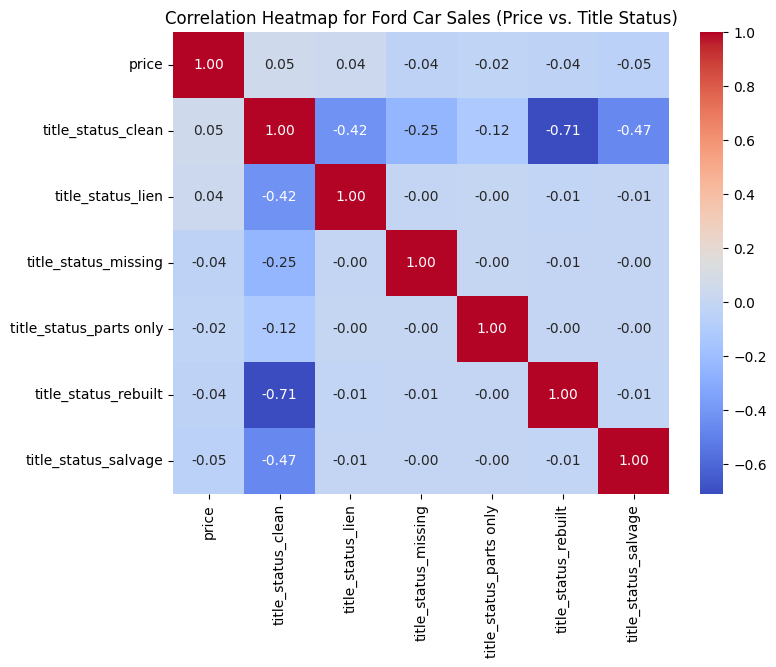

In [76]:
# prompt: Calculate correlation and heatmap between price and title_status for ford_car_sales.

import pandas as pd
import matplotlib.pyplot as plt
# Select the relevant columns for ford_car_sales
ford_corr = ford_car_sales[['price', 'title_status']].copy()

# Apply one-hot encoding to 'title_status'
ford_corr = pd.get_dummies(ford_corr, columns=['title_status'])

# Calculate the correlation matrix
correlation_matrix_ford = ford_corr.corr()

# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_ford, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Ford Car Sales (Price vs. Title Status)')
plt.show()

                       price      year  condition_fair  condition_good  \
price               1.000000 -0.004925        0.007147       -0.002208   
year               -0.004925  1.000000       -0.182816        0.039846   
condition_fair      0.007147 -0.182816        1.000000       -0.080046   
condition_good     -0.002208  0.039846       -0.080046        1.000000   
condition_like new -0.000728  0.007978       -0.029001       -0.144078   
condition_new      -0.000234  0.011770       -0.007029       -0.034920   
condition_salvage  -0.000221 -0.042861       -0.004766       -0.023678   

                    condition_like new  condition_new  condition_salvage  
price                        -0.000728      -0.000234          -0.000221  
year                          0.007978       0.011770          -0.042861  
condition_fair               -0.029001      -0.007029          -0.004766  
condition_good               -0.144078      -0.034920          -0.023678  
condition_like new            1.

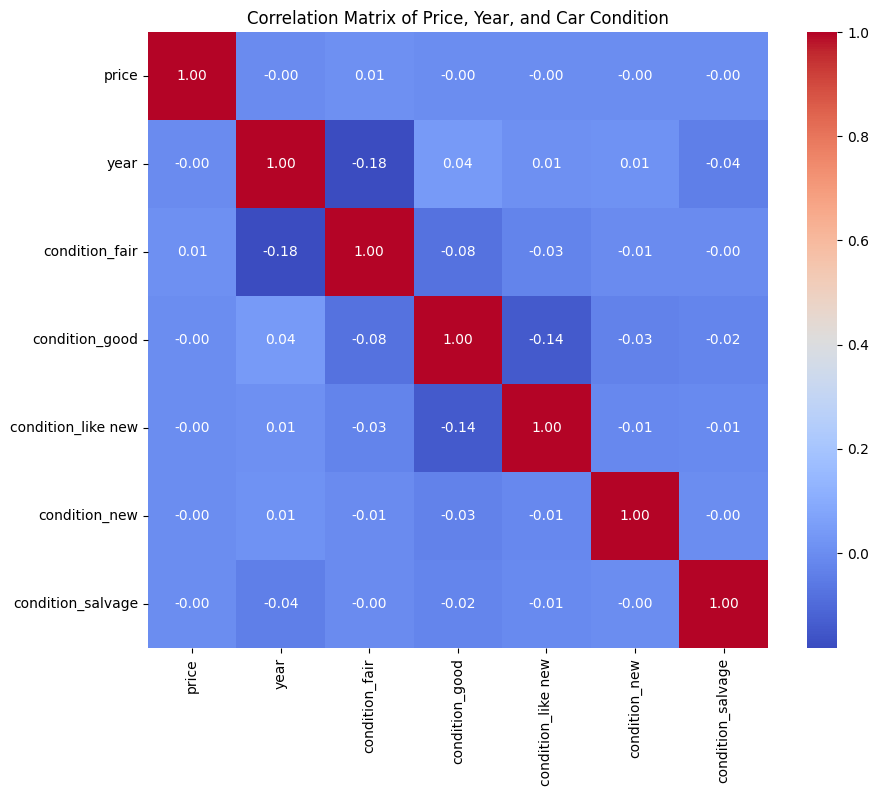

In [21]:
# Calculate correlation between price, condition and years

import pandas as pd
import matplotlib.pyplot as plt
# Convert 'condition' to numerical values using one-hot encoding
condition_dummies = pd.get_dummies(car_sales['condition'], prefix='condition', drop_first=True)
car_sales_encoded = pd.concat([car_sales, condition_dummies], axis=1)

# Calculate the correlation matrix for 'price', the encoded 'condition' columns, and 'year'
correlation_matrix = car_sales_encoded[['price', 'year'] + list(condition_dummies.columns)].corr()

# Print the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price, Year, and Car Condition')
plt.show()


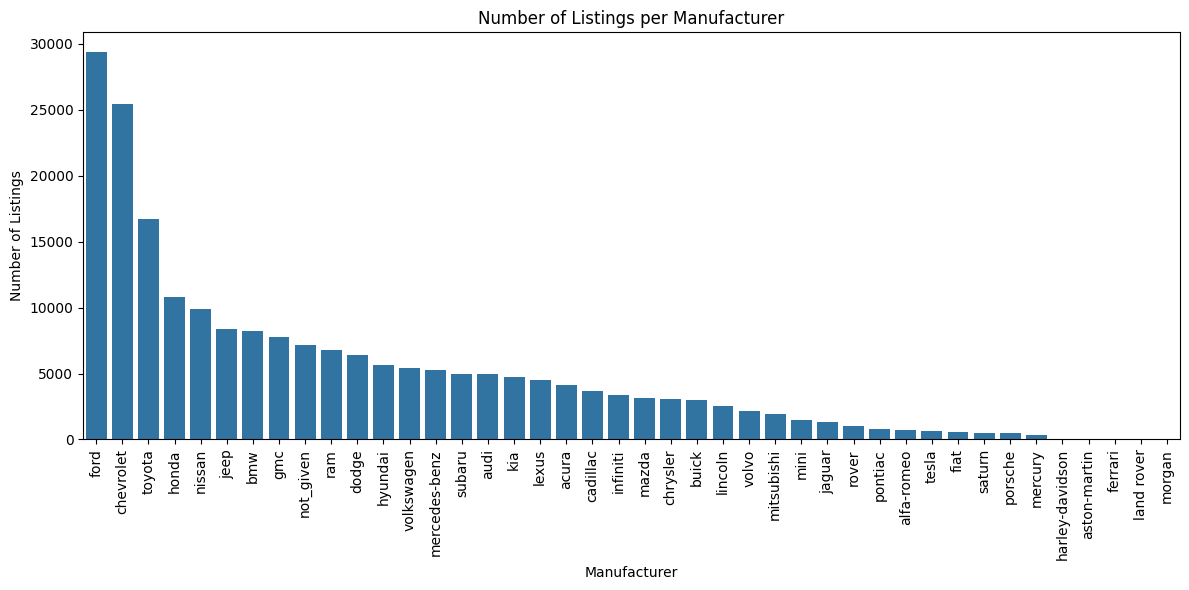

In [112]:
# A graph for number of cars sold per manufacturer

import matplotlib.pyplot as plt
# Get the number of listings per manufacturer
manufacturer_counts = car_sales['manufacturer'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Manufacturer")
plt.ylabel("Number of Listings")
plt.title("Number of Listings per Manufacturer")
plt.tight_layout()
plt.show()

/tmp/ipython-input-114-2479244098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_per_manufacturer.index, y=average_price_per_manufacturer.values, palette='viridis')


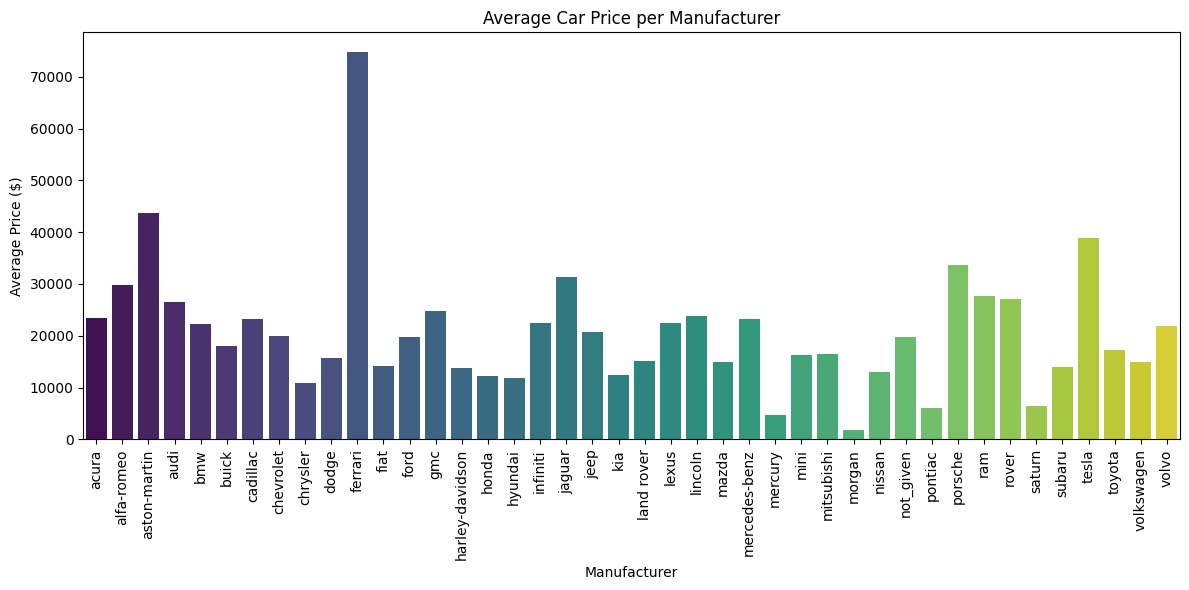

In [114]:
# A graph for average car price per manufacturer

import matplotlib.pyplot as plt
# Calculate the average price per manufacturer
average_price_per_manufacturer = car_sales.groupby('manufacturer')['price'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_per_manufacturer.index, y=average_price_per_manufacturer.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Manufacturer")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price per Manufacturer")
plt.tight_layout()
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

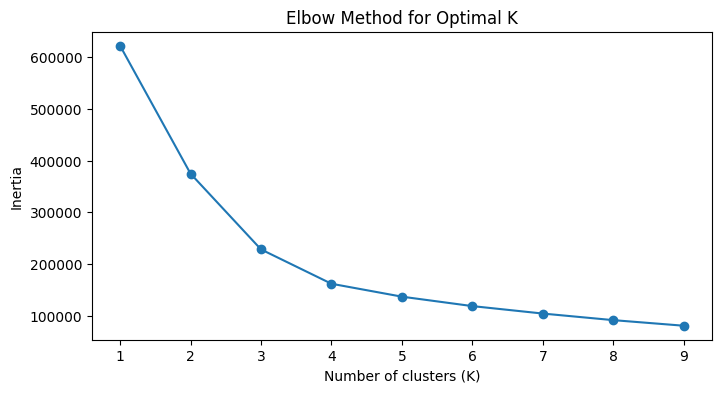

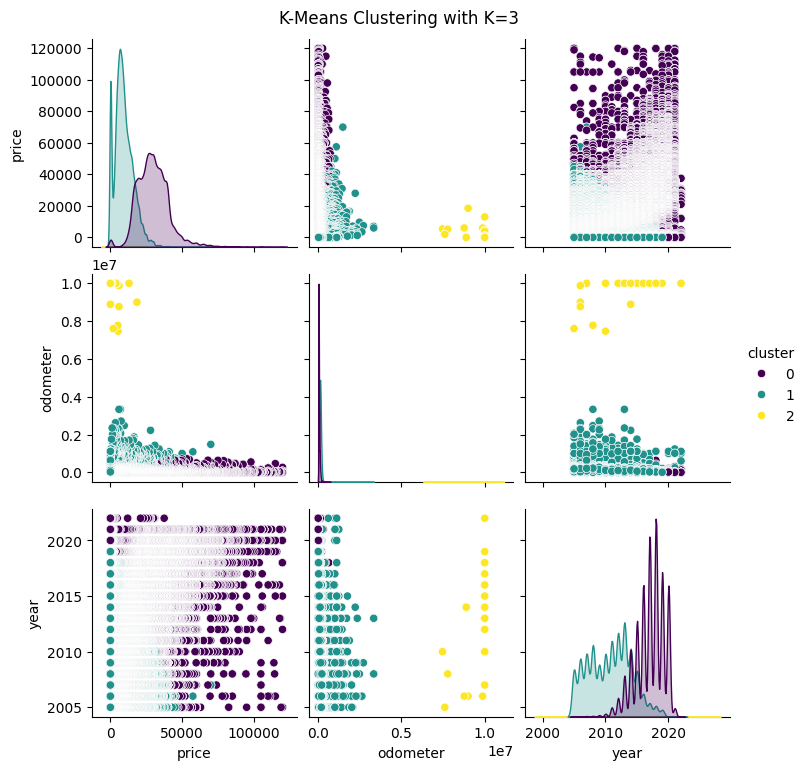

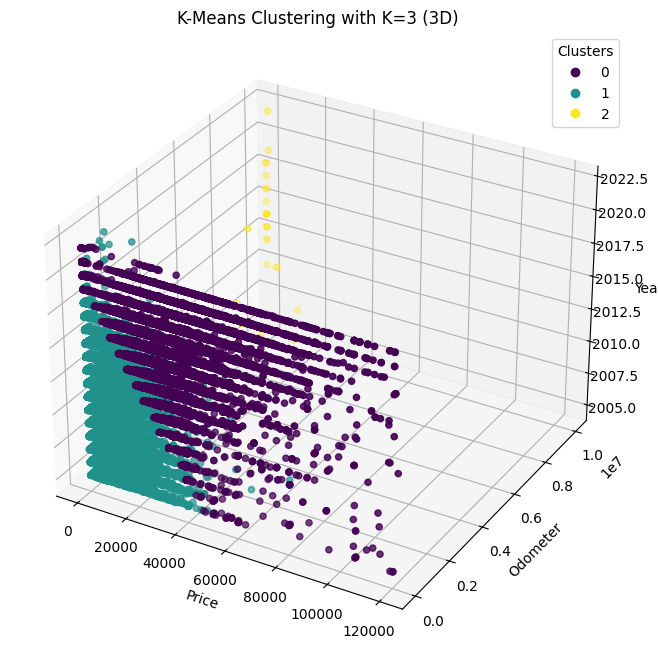


Cluster Means:
                price      odometer         year
cluster                                         
0        29752.781899  4.192635e+04  2017.018867
1         9256.528178  1.227799e+05  2010.713400
2         2135.419355  9.621521e+06  2012.709677

Cluster Counts:
cluster
0     99064
1    108189
2        31
Name: count, dtype: int64

Distribution of Car Type in Cluster 0:
type
sedan     0.214144
pickup    0.177340
SUV       0.155031
other     0.115239
truck     0.072711
Name: proportion, dtype: float64

Distribution of Car Type in Cluster 1:
type
sedan        0.278919
SUV          0.215928
not_given    0.162678
truck        0.079675
pickup       0.054229
Name: proportion, dtype: float64

Distribution of Car Type in Cluster 2:
type
truck        0.580645
SUV          0.129032
not_given    0.096774
sedan        0.096774
van          0.032258
Name: proportion, dtype: float64


In [116]:
# Create a k-means clustering model on car_sales dataframe and show the patterns with vizualization

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Select features for clustering (choose relevant numerical features)
features_for_clustering = ['price', 'odometer', 'year']
car_sales_clustering = car_sales[features_for_clustering].copy()

# Scale numerical features
scaler = StandardScaler()
car_sales_scaled = scaler.fit_transform(car_sales_clustering)

# Determine the optimal number of clusters (e.g., using the Elbow method)
inertia = []
K_range = range(1, 10)
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
  kmeans.fit(car_sales_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow method, let's choose a number of clusters (e.g., K=3 or K=4)
# Let's choose K=3 for this example
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Set n_init explicitly
car_sales_clustering['cluster'] = kmeans.fit_predict(car_sales_scaled)

# Visualize the clusters (using pairs of features)
# You can create scatter plots for different combinations of features colored by cluster
sns.pairplot(car_sales_clustering, vars=features_for_clustering, hue='cluster', palette='viridis')
plt.suptitle(f'K-Means Clustering with K={optimal_k}', y=1.02)
plt.show()

# You can also visualize the clusters using other plots, e.g., 3D scatter plot if you have 3 features
if len(features_for_clustering) == 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(car_sales_clustering['price'], car_sales_clustering['odometer'], car_sales_clustering['year'], c=car_sales_clustering['cluster'], cmap='viridis')
    ax.set_xlabel('Price')
    ax.set_ylabel('Odometer')
    ax.set_zlabel('Year')
    ax.set_title(f'K-Means Clustering with K={optimal_k} (3D)')
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()

# Analyze the characteristics of each cluster
cluster_means = car_sales_clustering.groupby('cluster')[features_for_clustering].mean()
print("\nCluster Means:")
print(cluster_means)

# Count the number of cars in each cluster
cluster_counts = car_sales_clustering['cluster'].value_counts().sort_index()
print("\nCluster Counts:")
print(cluster_counts)

# You can further analyze the clusters by looking at the distribution of other categorical features within each cluster
# For example, the distribution of car 'type' within each cluster
for cluster_id in sorted(car_sales_clustering['cluster'].unique()):
    print(f"\nDistribution of Car Type in Cluster {cluster_id}:")
    print(car_sales[car_sales_clustering['cluster'] == cluster_id]['type'].value_counts(normalize=True).head())

# Similarly, you can explore other features like 'manufacturer', 'fuel', 'transmission', etc.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.